# Tarea Grande 1

##### Nombre: Daniela Flores Villanueva
## Importación de librerías

En la siguiente celda, se importarán las librerías que serán utilizadas para esta parte de la tarea. Si deseas utilizar una librería adicional y que no sea *built-in*, repórtala en el ```README.md``` de tu repositorio. Solo así podremos saber que necesitamos instalar algo más para ejecutar tu tarea y evaluarla.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import altair as alt

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')


RendererRegistry.enable('notebook')

## Cargar datos

In [2]:
df = pd.read_csv("../dataset/data-iic1005-2019.csv")
df.head()

,id,fecha_siniestro,tipo_automovil,marca,modelo,lng,lat
0,31157,30-12-2010 0:00,TODO TERRENO,SSANGYONG,ACTYON XDI 4X2 (AY210),-58.4198526,-34.581720
1,31158,6/10/10 00:00,TODO TERRENO,SUZUKI,GRAND VITARA 1.6 GLX AC,-74.6876127,-14.359001
2,31162,4/1/11 00:00,AUTOMOVIL,SUZUKI,SX4 1.6 CROSSOVER,-78.4711238,-0.293894
3,31165,5/1/11 00:00,AUTOMOVIL,CHEVROLET,OPTRA II LS NB 1.6 MT AC,-70.5918986,-33.567042
4,31168,6/1/11 00:00,AUTOMOVIL,HYUNDAI,ACCENT 1.3 L,-70.6285939,-33.452673


## Estandarizar fechas

In [3]:
df_copy = df.copy(deep=True)

### Forma incorrecta (notar diferencia de la segunda fila con la de la segunda fila de la forma correcta)

In [4]:
df_copy["fecha_siniestro"] = pd.to_datetime(df_copy["fecha_siniestro"])
df_copy["fecha_siniestro"] = df_copy["fecha_siniestro"].dt.strftime("%d-%m-%Y %H:%M")
df_copy.head()

,id,fecha_siniestro,tipo_automovil,marca,modelo,lng,lat
0,31157,30-12-2010 00:00,TODO TERRENO,SSANGYONG,ACTYON XDI 4X2 (AY210),-58.4198526,-34.581720
1,31158,10-06-2010 00:00,TODO TERRENO,SUZUKI,GRAND VITARA 1.6 GLX AC,-74.6876127,-14.359001
2,31162,01-04-2011 00:00,AUTOMOVIL,SUZUKI,SX4 1.6 CROSSOVER,-78.4711238,-0.293894
3,31165,01-05-2011 00:00,AUTOMOVIL,CHEVROLET,OPTRA II LS NB 1.6 MT AC,-70.5918986,-33.567042
4,31168,01-06-2011 00:00,AUTOMOVIL,HYUNDAI,ACCENT 1.3 L,-70.6285939,-33.452673


### Forma correcta

In [5]:
# Completar
df["fecha_siniestro"] = pd.to_datetime(df["fecha_siniestro"], dayfirst=True)
df["fecha_siniestro"] = df["fecha_siniestro"].dt.strftime("%d-%m-%Y %H:%M")
df.head()

,id,fecha_siniestro,tipo_automovil,marca,modelo,lng,lat
0,31157,30-12-2010 00:00,TODO TERRENO,SSANGYONG,ACTYON XDI 4X2 (AY210),-58.4198526,-34.581720
1,31158,06-10-2010 00:00,TODO TERRENO,SUZUKI,GRAND VITARA 1.6 GLX AC,-74.6876127,-14.359001
2,31162,04-01-2011 00:00,AUTOMOVIL,SUZUKI,SX4 1.6 CROSSOVER,-78.4711238,-0.293894
3,31165,05-01-2011 00:00,AUTOMOVIL,CHEVROLET,OPTRA II LS NB 1.6 MT AC,-70.5918986,-33.567042
4,31168,06-01-2011 00:00,AUTOMOVIL,HYUNDAI,ACCENT 1.3 L,-70.6285939,-33.452673


## Gráfico de línea sobre cantidad de robos según día de la semana

In [6]:
df.head()

,id,fecha_siniestro,tipo_automovil,marca,modelo,lng,lat
0,31157,30-12-2010 00:00,TODO TERRENO,SSANGYONG,ACTYON XDI 4X2 (AY210),-58.4198526,-34.581720
1,31158,06-10-2010 00:00,TODO TERRENO,SUZUKI,GRAND VITARA 1.6 GLX AC,-74.6876127,-14.359001
2,31162,04-01-2011 00:00,AUTOMOVIL,SUZUKI,SX4 1.6 CROSSOVER,-78.4711238,-0.293894
3,31165,05-01-2011 00:00,AUTOMOVIL,CHEVROLET,OPTRA II LS NB 1.6 MT AC,-70.5918986,-33.567042
4,31168,06-01-2011 00:00,AUTOMOVIL,HYUNDAI,ACCENT 1.3 L,-70.6285939,-33.452673


Antes de trabajar con las fechas, conviene ver el tipo de dato de la columna `fecha_siniestro`:

In [7]:
df.dtypes

id                   int64
fecha_siniestro     object
tipo_automovil      object
marca               object
modelo              object
lng                 object
lat                float64
dtype: object

Vemos que es de tipo objeto, lo que nos impediría trabajar con la columna fácilmente. Por esta razón, la convertimos al tipo `datetime64[ns]`, usando el formato que ya sabemos que tienen las fechas ya convertidas en el ítem anterior.

In [8]:
df["fecha_siniestro"] =  pd.to_datetime(df["fecha_siniestro"], format="%d-%m-%Y %H:%M")
df.dtypes

id                          int64
fecha_siniestro    datetime64[ns]
tipo_automovil             object
marca                      object
modelo                     object
lng                        object
lat                       float64
dtype: object

In [9]:
# Completar
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
week_df = df.groupby(df["fecha_siniestro"].dt.strftime('%A')).count().reindex(days)["id"].reset_index()
week_df.columns = ["Day", "Total"]
week_df.head()

,Day,Total
0,Monday,225
1,Tuesday,247
2,Wednesday,254
3,Thursday,250
4,Friday,241


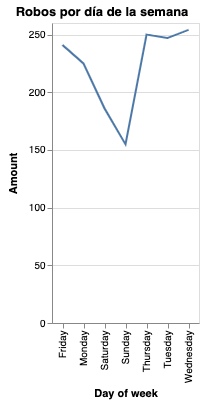

In [10]:
week_chart = alt.Chart(week_df).mark_line().encode(
    x='Day',
    y='Total'
).properties(
    title='Robos por día de la semana')
week_chart.encoding.y.title = "Amount"
week_chart.encoding.x.title = "Day of week"
week_chart

## Gráfico de barra mes versus cantidad de robos

In [11]:
# Completar
months = ["January","February","March","April","May","June","July",
            "August","September","October","November","December"]
month_df = df.groupby(df["fecha_siniestro"].dt.month_name()).count().reindex(months)["id"].reset_index()
month_df.columns = ["Month", "Total"]
month_df

,Month,Total
0,January,263.0
1,February,240.0
2,March,324.0
3,April,293.0
4,May,411.0
5,June,23.0
6,July,1.0
7,August,NaN
8,September,NaN
9,October,1.0


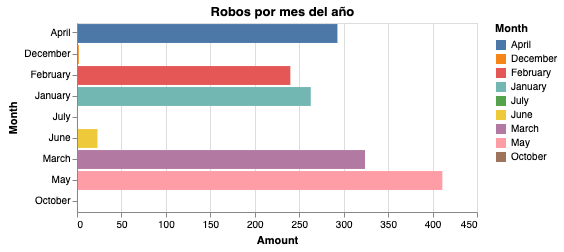

In [12]:
month_chart = alt.Chart(month_df).mark_bar().encode(
    y="Month",
    x="Total",
    color="Month"
).properties(
    title='Robos por mes del año')
month_chart.encoding.x.title = "Amount"
month_chart.encoding.y.title = "Month"
month_chart

## Gráficos de torta de marcas y tipos más robados

In [13]:
# Completar
types_df = df["tipo_automovil"].value_counts().reset_index()
types_df = types_df.sort_values("tipo_automovil", ascending=False)
types_df.columns = ["Tipo Automóvil", "Total"]
top_types_df = types_df.iloc[0:5]
top_types_df

,Tipo Automóvil,Total
0,AUTOMOVIL,801
1,CAMIONETA,313
2,STATION WAGON,232
3,TODO TERRENO,110
4,FURGON,44


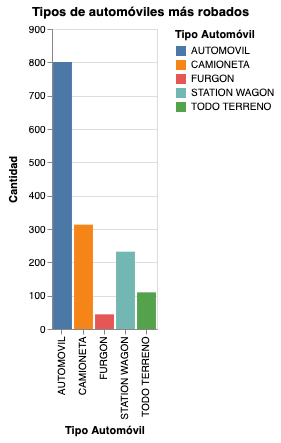

In [14]:
top_types_chart = alt.Chart(top_types_df).mark_bar().encode(
    x="Tipo Automóvil",
    y="Total",
    color="Tipo Automóvil"
).properties(
    title='Tipos de automóviles más robados')
top_types_chart.encoding.x.title = "Tipo Automóvil"
top_types_chart.encoding.y.title = "Cantidad"
top_types_chart

In [15]:
brands_df = df["marca"].value_counts().reset_index()
brands_df = brands_df.sort_values("marca", ascending=False)
brands_df.columns = ["Marca", "Total"]
top_brands_df = brands_df.iloc[0:5]
top_brands_df

,Marca,Total
0,TOYOTA,371
1,SUZUKI,285
2,NISSAN,187
3,HYUNDAI,164
4,CHEVROLET,128


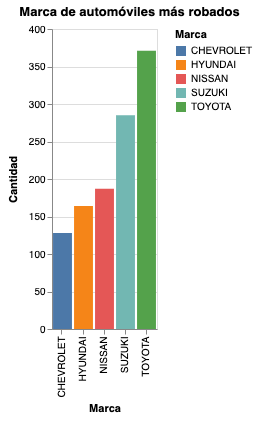

In [16]:
top_brands_chart = alt.Chart(top_brands_df).mark_bar().encode(
    x="Marca",
    y="Total",
    color="Marca"
).properties(
    title="Marca de automóviles más robados")
top_brands_chart.encoding.x.title = "Marca"
top_brands_chart.encoding.y.title = "Cantidad"
top_brands_chart